## Question 1 Convolution operation 

* without max pooling and with stride of 1



    | 0 | -2| -4|  1|  4|  1|  0|
    |---|---|---|---|---|---|---|
    |-3 | -3| -2|  2|  4|  1|  1|
    |-5 | -7| -1|  6|  4|  1|  2|
    |-7 | -5|  0|  3|  3|  2|  4|
    |-4 | -5| -5|  1|  5|  4|  4|
    |-2 | -1| -6| -3|  5|  4|  3|
    | 0 | -1| -3| -1|  2|  2|  1|

* without max pooling and with stride of 2

    | 0 | -4 |  4 |  0 |
    |---|----|----|----|
    |-5 | -1 |  4 |  2 |
    |-4 | -5 |  5 |  4 |
    | 0 | -3 |  2 |  1 |


* with max pooling and with stride of 1



    | 0 | 6 | 4 |
    |---|---|---|
    | 0 | 6 | 5 |
    | 0 | 5 | 5 |


In order to solve question 1 I just made a python script that did the convoltuion operation, I had some trouble implementing the max pooling function as failed to see the green bit in the numbers that said to use a stride of 2 when doing the max pooling. I was trying to do it with a stride of 1 and it wasn't working. After beating my head on it for about 45 mins I tried a stride of 2 and checked the document as realized I was supposed to do that in the first place.

## Question 2 Convolution operation 

#### Dataloader 
Download the MNIST dataset and get the dataloader in PyTorch

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim


# Define the transformation sequence for preprocessing the images
transform = transforms.Compose([
    # Convert image from PIL format or numpy.ndarray to a FloatTensor
    transforms.ToTensor(),
    # Normalize the tensor image with mean and standard deviation
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset for training with predefined transformations
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load the MNIST dataset for testing with predefined transformations
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Set up a DataLoader for the training dataset with shuffling and batch sizing
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Set up a DataLoader for the testing dataset without shuffling and with batch sizing
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


#### Data Exploration 

Pick one example from each digit and visualize them. Count the number of samples per digit in the original training data.

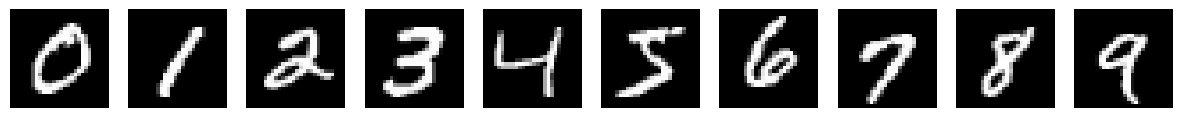

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [2]:
# Initialize dictionaries to store the first image of each digit and count the occurrences of each digit
digits = {i: None for i in range(10)}
counts = {i: 0 for i in range(10)}

# Loop through the dataset to populate 'digits' with the first image of each digit and 'counts' with the total occurrences
for image, label in train_data:
    # Increment the count for this digit
    counts[label] += 1
    if digits[label] is None:
        # Store the first image for this digit if not already stored
        digits[label] = image

# Set up a figure with 10 subplots to display one example per digit
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for digit, ax in zip(digits.values(), axes):
    # Display the image, removing any singleton dimensions
    ax.imshow(digit.squeeze(), cmap='gray')
    # Hide the axes for a cleaner display
    ax.axis('off')
# Show the figure with the images
plt.show()  

# Iterate over the digit counts and print out the number of samples for each digit
for digit, count in counts.items():
    # Print the count of each digit in the dataset
    print(f"Digit {digit}: {count} samples")

#### Modeling 
Implement a Convolutional Neural Network model using Convolution layers to classify the digits in the MNIST dataset

#### First Model

In [3]:
train_size = int(0.8 * len(train_data))
validation_size = len(train_data) - train_size
train_dataset, validation_dataset = random_split(train_data, [train_size, validation_size])


class TanhCNN(nn.Module):
    def __init__(self):
        super(TanhCNN, self).__init__()
        # Convolutional layer that takes 1 input channel and produces 32 output channels
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Fully connected layer that takes the flattened output from the conv layer and outputs 128 nodes
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        # Fully connected layer that outputs 10 nodes (one for each class of MNIST digits)
        self.fc2 = nn.Linear(128, 10)
        # Max pooling layer with a kernel size of 2x2
        self.pool = nn.MaxPool2d(2, 2)
        # Tanh activation function
        self.tanh = nn.Tanh()

    def forward(self, x):
        # Apply the convolutional layer followed by Tanh activation and pooling
        x = self.pool(self.tanh(self.conv1(x)))
        # Flatten the output from the pooling layer to feed into the fully connected layers
        x = x.view(-1, 32 * 14 * 14)  
        # Apply the first fully connected layer with Tanh activation
        x = self.tanh(self.fc1(x))
        # Apply the second fully connected layer to produce the final output
        x = self.fc2(x)
        return x

#### Second Model

In [4]:
class ReluCNN(nn.Module):  # Inherits from nn.Module
    def __init__(self):
        super(ReluCNN, self).__init__()  # Initialize the superclass
        # Convolutional layer that takes 1 input channel and produces 16 output channels
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        # Second convolutional layer that takes 16 input channels and produces 32 output channels
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # Fully connected layer that takes the flattened output from conv layers and outputs 128 nodes
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        # Fully connected layer that outputs 10 nodes (one for each class of MNIST digits)
        self.fc2 = nn.Linear(128, 10)
        # Activation function ReLU
        self.relu = nn.ReLU()
        # Pooling layer to reduce spatial dimensions of the output from conv layers
        self.pool = nn.MaxPool2d(2, 2)
        # Dropout layer to prevent overfitting by randomly setting input elements to zero
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Apply the first convolutional layer followed by ReLU activation and pooling
        x = self.pool(self.relu(self.conv1(x)))
        # Apply the second convolutional layer followed by ReLU activation and pooling
        x = self.pool(self.relu(self.conv2(x)))
        # Flatten the output from the last pooling layer to feed into the fully connected layer
        x = x.view(-1, 32 * 7 * 7)
        # Apply the first fully connected layer with ReLU activation
        x = self.relu(self.fc1(x))
        # Apply dropout to the output of the first fully connected layer
        x = self.dropout(x)
        # Apply the second fully connected layer to produce final output
        x = self.fc2(x)
        return x

Epoch 1, Loss: 0.28094138448126615
Epoch 2, Loss: 0.08702179072207461
Epoch 3, Loss: 0.05444802258326672
Epoch 4, Loss: 0.03767062279729483
Epoch 5, Loss: 0.026249286182942644
Epoch 6, Loss: 0.021592497054720296
Epoch 7, Loss: 0.01571974488189638
Epoch 8, Loss: 0.01220826218998991
Epoch 9, Loss: 0.010556550108201918
Epoch 10, Loss: 0.013459414627652828
Validation Accuracy: 97.83333333333333%
Test Accuracy: 97.76%
Filters: 


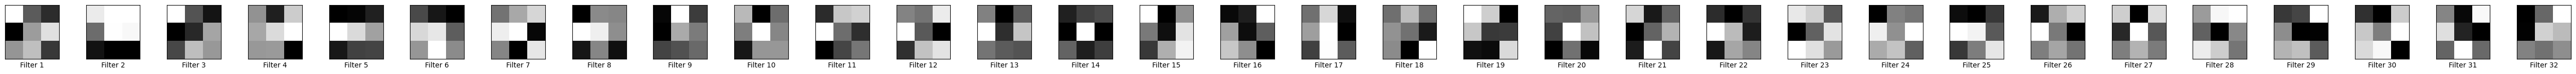

Epoch 1, Loss: 0.303535509403795
Epoch 2, Loss: 0.10962435268471017
Epoch 3, Loss: 0.08294790950984073
Epoch 4, Loss: 0.06806309967542377
Epoch 5, Loss: 0.05920084185666444
Epoch 6, Loss: 0.04941295935420203
Epoch 7, Loss: 0.04417756902926097
Epoch 8, Loss: 0.041349895134932015
Epoch 9, Loss: 0.036567597344346725
Epoch 10, Loss: 0.033570523014744294
Validation Accuracy: 98.85833333333333%
Test Accuracy: 99.1%


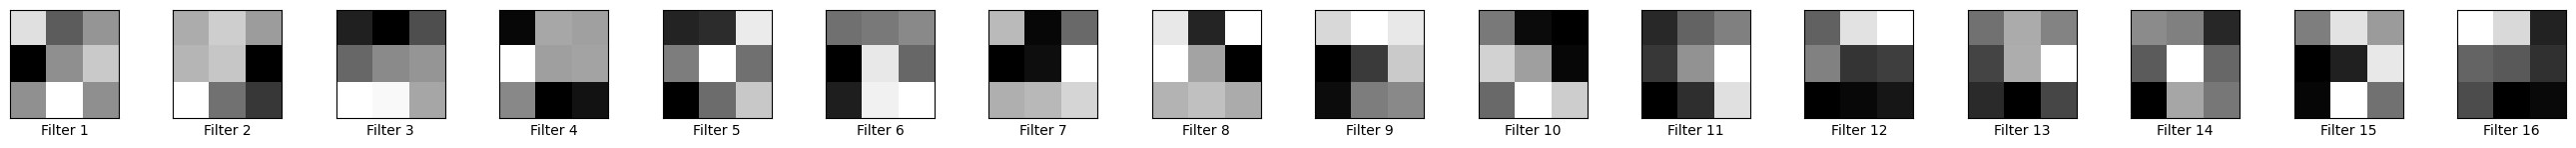

In [5]:

def train_model(model, train_loader, validation_loader, epochs=10):
    # Loss function suitable for classification with multiple classes
    criterion = nn.CrossEntropyLoss()  
    # Use Adam optimizer with learning rate of 0.001
    optimizer = optim.Adam(model.parameters(), lr=0.001)  

    # Training loop over the specified number of epochs
    for epoch in range(epochs):
        # Variable to accumulate loss over the epoch
        running_loss = 0.0  
        for images, labels in train_loader:
            # Clear gradients for each batch
            optimizer.zero_grad() 
            # Forward pass: compute predicted outputs
            outputs = model(images)
            # Compute loss between predicted and true labels
            loss = criterion(outputs, labels)
            # Backpropagate the error
            loss.backward()
            # Perform a single optimization step
            optimizer.step()
            # Sum up loss for reporting
            running_loss += loss.item()
            # Print average loss per epoch
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")
    
    # Set the model to evaluation mode
    model.eval()
    # Set total and correct to 0 
    total = 0
    correct = 0
    # Disable gradient calculation to speed up the process
    with torch.no_grad():
        for images, labels in validation_loader:
            # Compute model output
            outputs = model(images) 
            # Get the predicted class from the maximum value
            _, predicted = torch.max(outputs.data, 1)  
            # Update total count of processed samples
            total += labels.size(0)
            # Update correct prediction count
            correct += (predicted == labels).sum().item()
    # Print the validation accuracy of the model
    print(f'Validation Accuracy: {100 * correct / total}%')  
    return model



# Function to visualize convolutional filters
def visualize_filters(model):
    # Set the model to evaluation mode
    model.eval()  
    # No need to track gradients for visualization
    with torch.no_grad():  
        # Define number of filters in the first convolutional layer
        num_filters = model.conv1.out_channels
        # Create a grid of subplots
        fig, axarr = plt.subplots(1, num_filters, figsize=(num_filters * 2, 2))
        # Loop over all filters in the first convolutional layer
        for idx in range(num_filters):
            # Display each filter using grayscale color map
            axarr[idx].imshow(model.conv1.weight.data[idx].squeeze(), cmap='gray')
            # Enable axis on each subplot to show axis ticks and labels
            axarr[idx].axis('on')

            # Hides x-axis ticks
            axarr[idx].set_xticks([])
            # Hides y-axis ticks  
            axarr[idx].set_yticks([])
            # Label each filter
            axarr[idx].set_xlabel(f'Filter {idx+1}')

        # Adjust spacing between each subplot to prevent overlap
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

        # Display the plot
        plt.show()



def test_model(model, test_loader):
    # Set the model to evaluation mode
    model.eval() 
     # Set total samples and correct samples to 0 
    total = 0  
    correct = 0  
    # Disable gradient calculation to speed up the process
    with torch.no_grad():
        # Iterate over batches of test data
        for images, labels in test_loader:
            # Generate model predictions for the current batch
            outputs = model(images)
            # Find the predicted class labels (indices of maximum scores)
            _, predicted = torch.max(outputs.data, 1)
            # Increment the total count by the number of labels in the current batch
            total += labels.size(0)
            # Increment the correct count by the number of correct predictions in the batch
            correct += (predicted == labels).sum().item()
    # Calculate the accuracy of the model on the test set
    accuracy = 100 * correct / total  
    # Print the test accuracy of the model
    print(f'Test Accuracy: {accuracy}%') 
    return accuracy




# Build Tanh model
model = TanhCNN()
# Train Tanh model
trained_model = train_model(model, DataLoader(train_dataset, batch_size=32, shuffle=True), DataLoader(validation_dataset, batch_size=32, shuffle=False))
# Test Tanh model
test_model(trained_model, test_loader)
# Visualize Layers for Tanh model
print("Filters: ")
visualize_filters(trained_model)



# Build Relu model
model_2 = ReluCNN()
# Train Relu model
trained_model_2 = train_model(model_2, DataLoader(train_dataset, batch_size=32, shuffle=True), DataLoader(validation_dataset, batch_size=32, shuffle=False))
# Test Relu model
test_model(trained_model_2, test_loader)
# Visualize Layers for Relu model
visualize_filters(trained_model_2)

For Question 2 I started with a simple model with Tanh function as my activation function, I didn't set up dropout or a second convolution layer as I just wanted to try building the CNN and get it working. I just kept things simple and focused on my training function which was I struggled with a bit, I was following the tutorials on the pytorch website but I missed the step where the optimizer gets it's gradients cleared. This led to really high increasing loss and it took me awhile going through the pytorch docs to realize I missed a step.

When I made the second model I tried Relu for my activation function I also added a second convolution layer and dropout this led to improvment over my first model on the test dataset by .2417%.